## Observations and Insights 

In [110]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [111]:
#view both csv's
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [112]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [113]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [114]:
mouse_metadata.shape

(249, 5)

In [115]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [116]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [119]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [120]:
study_results.shape

(1893, 4)

In [121]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
df2 = df.rename(columns = {"Mouse ID": "mouse_id", "Drug Regimen": "drug_regimen", "Age_months": "age_months", "Weight (g)": "weight_g", "Tumor Volume (mm3)": "tumorVolume_mm3", "Metastatic Sites": "metastatic_sites"})

df2.head()

,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mouse_id          1893 non-null   object 
 1   drug_regimen      1893 non-null   object 
 2   Sex               1893 non-null   object 
 3   age_months        1893 non-null   int64  
 4   weight_g          1893 non-null   int64  
 5   Timepoint         1893 non-null   int64  
 6   tumorVolume_mm3   1893 non-null   float64
 7   metastatic_sites  1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [124]:
df2.describe()

,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [125]:
df2.shape

(1893, 8)

In [126]:
# Checking the number of mice.
mice = df2.mouse_id.nunique()

print(f'There are {mice} number of mice in the study')

There are 249 number of mice in the study


In [127]:
#find duplicate information
duplicate = df2[df2.duplicated(['mouse_id', "Timepoint"])]
duplicate

,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [128]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_info = df2.loc[df2['mouse_id']=='g989']
g989_info

,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [129]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df3 = df2[df2["mouse_id"] != "g989"]
df3.head()

,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [130]:
# Checking the number of mice in the clean DataFrame.
df3.mouse_id.nunique()


248

In [131]:
print(df3.drug_regimen.unique())

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


## Summary Statistics

In [159]:
# df3.groupby("drug_regimen").mean()["tumorVolume_mm3"]
df3.groupby("drug_regimen").mean()["tumorVolume_mm3"]

drug_regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: tumorVolume_mm3, dtype: float64

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

average = df3.groupby("drug_regimen")["tumorVolume_mm3"].mean()
median = df3.groupby("drug_regimen")["tumorVolume_mm3"].median()
variance = df3.groupby("drug_regimen")["tumorVolume_mm3"].var()
standardDev = df3.groupby("drug_regimen")["tumorVolume_mm3"].std()
SEMs = df3.groupby("drug_regimen")["tumorVolume_mm3"].sem()

sumtable = pd.concat([average, median, variance,standardDev,SEMs],axis=1)
sumtable.columns=["Mean", "Median", "Variance", "Standard Dev","SEM"]
sumtable

,Mean,Median,Variance,Standard Dev,SEM
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [149]:
df3.head()

,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [157]:
df3.loc[:,'mouse_id':'tumorVolume_mm3']

,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3
0,k403,Ramicane,Male,21,16,0,45.000000
1,k403,Ramicane,Male,21,16,5,38.825898
2,k403,Ramicane,Male,21,16,10,35.014271
3,k403,Ramicane,Male,21,16,15,34.223992
4,k403,Ramicane,Male,21,16,20,32.997729
...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652
1889,z969,Naftisol,Male,9,30,30,65.841013
1890,z969,Naftisol,Male,9,30,35,69.176246
1891,z969,Naftisol,Male,9,30,40,70.314904


In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# ["tumorVolume_mm3"]
# Using the aggregation method, produce the same summary statistics in a single line
regimens = df3.groupby('drug_regimen')
summary = regimens.agg(['mean','median','var','std','sem'])['tumorVolume_mm3']
summary

,mean,median,var,std,sem
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Create a list indicating where to write x labels and set figure size to adjust for space
# mice_treated = df3.groupby(['drug_regimen']).count()['Timepoint']
mice_treated=df3['drug_regimen'].value_counts().reset_index()
mice_treated.columns = ["Regimen", 'Count' ]
mice_treated

,Regimen,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


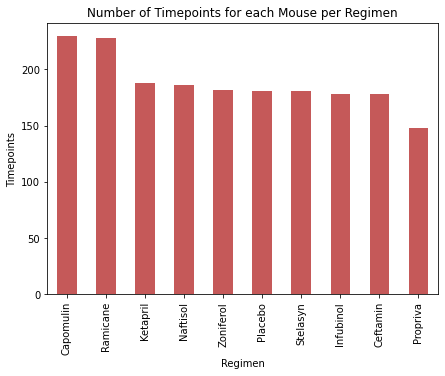

In [32]:
bar = df3['drug_regimen'].value_counts().plot(kind='bar',color='firebrick', alpha=0.75,figsize=(7,5))
bar.set_title('Number of Timepoints for each Mouse per Regimen')
bar.set_xlabel('Regimen')
bar.set_ylabel('Timepoints')
plt.show()



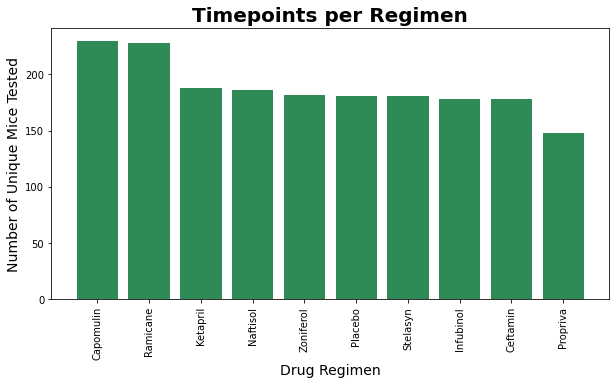

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,5))
plt.bar(mice_treated.Regimen,mice_treated.Count, color = "seagreen")
plt.title("Timepoints per Regimen", fontsize = 20, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Unique Mice Tested", fontsize = 14)
plt.xticks(rotation=90)
plt.show()

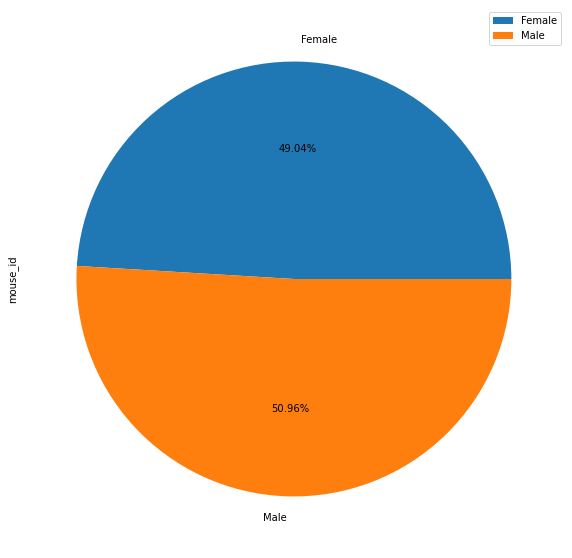

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df4 = df3.groupby('Sex')['mouse_id'].count()
df4.plot(kind  = "pie", autopct='%.2f%%', legend = True, figsize = (10,10))

plt.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


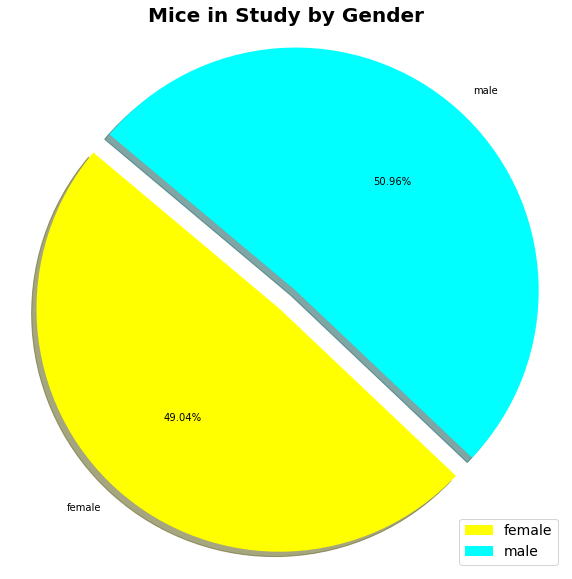

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(10,10))
explode = (0.1,0)
labels = ("female", "male")
colors = ("yellow","aqua")
plt.pie(df4, explode=explode, labels=labels, colors=colors,
        autopct="%.2f%%", shadow=True, startangle=140)
plt.title("Mice in Study by Gender",fontsize=20, fontweight="bold", fontname="Helvetica")
plt.rcParams.update({'font.size': 14})
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.legend()

plt.show()

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
updated_treatment = df3[df3["drug_regimen"].isin(drugs)]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = updated_treatment.groupby("mouse_id")["Timepoint"].max()
last_timepoint


mouse_id
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [45]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df6 =pd.merge(df3, last_timepoint, on ='mouse_id', how ="left")
df7 = df6.rename(columns = {"Timepoint_x": "Timepoint","Timepoint_y": "last_timepoint"})
df7.head()


,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites,last_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0


In [46]:
df7.shape

(1880, 9)

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []


#create loop - Locate the rows which contain mice on each drug and get the tumor volumes
for x in drugs:
    # add subset 
    end_volume = df7.loc[df7['drug_regimen']==x]
    
    volume_df = end_volume.loc[end_volume["Timepoint"] == end_volume["last_timepoint"]]
  
 # Append to tumor_vol list
    tumor = volume_df['tumorVolume_mm3']
    tumor_vol.append(tumor)
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    median = tumor.median()
    print(f'The median for {x} is {median}.')
    quartiles = tumor.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    print(f'Lower quartile for {x} is {lower_q}')
    print(f'Upper quartile for {x} is {upper_q}')
    
    # Determine outliers using upper and lower bounds
    iqr = upper_q-lower_q
    lower_bound = lower_q-1.5*iqr
    upper_bound = upper_q+1.5*iqr
    print(f'Lower bound for {x} is {lower_bound} and could be an outlier')
    print(f'Upper bound for {x} is {upper_bound} and could be an outlier')
    
tumor_vol
    
    
    
    
    
    
    
    

The median for Capomulin is 38.1251644.
Lower quartile for Capomulin is 32.37735684
Upper quartile for Capomulin is 40.1592203
Lower bound for Capomulin is 20.70456164999999 and could be an outlier
Upper bound for Capomulin is 51.83201549 and could be an outlier
The median for Ramicane is 36.56165229.
Lower quartile for Ramicane is 31.56046955
Upper quartile for Ramicane is 40.65900627
Lower bound for Ramicane is 17.912664470000003 and could be an outlier
Upper bound for Ramicane is 54.30681135 and could be an outlier
The median for Infubinol is 60.16518046.
Lower quartile for Infubinol is 54.04860769
Upper quartile for Infubinol is 65.52574285
Lower bound for Infubinol is 36.83290494999999 and could be an outlier
Upper bound for Infubinol is 82.74144559000001 and could be an outlier
The median for Ceftamin is 59.85195552.
Lower quartile for Ceftamin is 48.72207785
Upper quartile for Ceftamin is 64.29983003
Lower bound for Ceftamin is 25.355449580000002 and could be an outlier
Upper bo

[19      23.343598
 29      28.484033
 39      28.430964
 64      30.485985
 104     31.023923
 124     31.896238
 134     32.377357
 144     33.329098
 164     34.455298
 204     37.311846
 224     36.041047
 244     37.074024
 282     38.846876
 299     38.939633
 309     38.982878
 317     38.753265
 337     38.125164
 340     39.952347
 350     40.658124
 360     40.159220
 370     40.728578
 380     41.483008
 390     41.581521
 440     47.685963
 1442    46.539206
 Name: tumorVolume_mm3, dtype: float64,
 9      22.050126
 49     29.128472
 59     30.276232
 74     30.564625
 84     30.638696
 94     31.560470
 114    31.095335
 154    33.397653
 174    32.978522
 184    33.562402
 194    36.134852
 214    38.810366
 234    37.225650
 254    36.374510
 262    36.561652
 272    37.311236
 289    38.342008
 327    38.407618
 400    40.659006
 410    40.667713
 420    45.220869
 430    43.047543
 447    43.419381
 449    43.166373
 453    44.183451
 Name: tumorVolume_mm3, dtype: floa

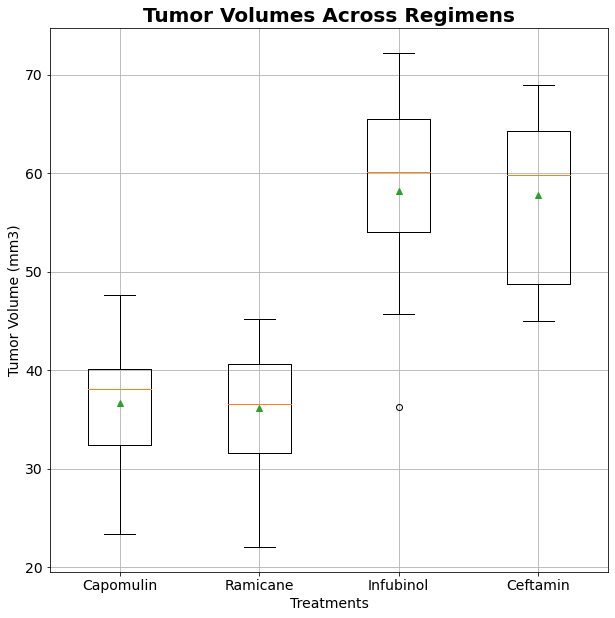

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Values are generated in the previous cell
plt.figure(figsize=(10,10))
plt.boxplot(tumor_vol, showmeans=True)
plt.title('Tumor Volumes Across Regimens', fontsize=20, fontweight='bold')
plt.xlabel('Treatments',fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

plt.xticks([1,2,3,4],treatments)
plt.grid()
plt.show()

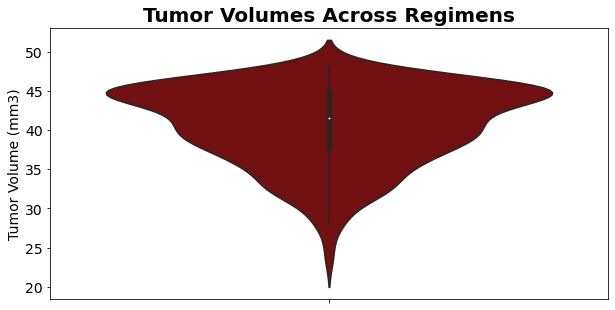

In [147]:
plt.figure(figsize=(10,5))
sns.violinplot(data=capomulin, y="tumorVolume_mm3", color = "maroon")
plt.title('Tumor Volumes Across Regimens', fontsize=20, fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.show()

## Line and Scatter Plots

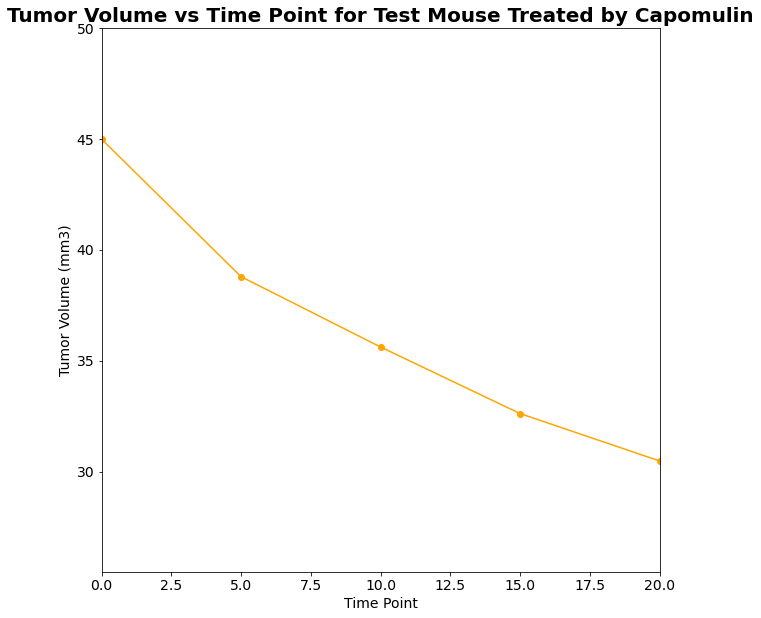

In [148]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = df7[df7["drug_regimen"] == "Capomulin"]

plt.figure(figsize=(10,10))
mouse_pick = capomulin["mouse_id"].unique()
test_mouse = capomulin.loc[capomulin["mouse_id"] == mouse_pick[3]]
tp = test_mouse["Timepoint"]
test_tumor = test_mouse["tumorVolume_mm3"]
plt.plot(tp, test_tumor, marker = "o", color="orange")
plt.title("Tumor Volume vs Time Point for Test Mouse Treated by Capomulin", fontsize=20, fontweight="bold")
plt.xlabel("Time Point", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)
plt.xlim(min(tp), max(tp))
plt.ylim(min(test_tumor) - 5, max(test_tumor) + 5)

plt.show() 


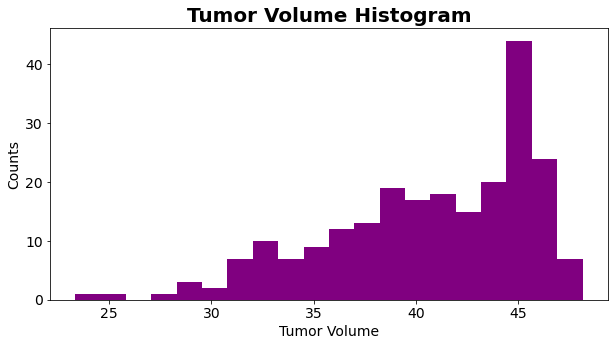

In [61]:
#create histogram

plt.figure(figsize=(10,5))
plt.hist(capomulin.tumorVolume_mm3, bins=20, color='purple')
plt.title('Tumor Volume Histogram', fontsize=20, fontweight='bold')
plt.xlabel('Tumor Volume', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()


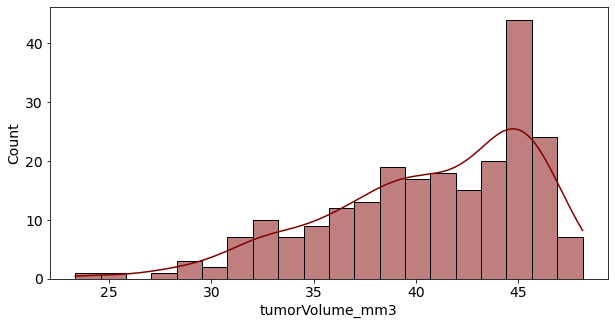

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(data=capomulin, x="tumorVolume_mm3", kde=True, bins=20, color='maroon')
plt.show()

In [143]:
capomulin


,mouse_id,drug_regimen,Sex,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites,last_timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45.0
11,s185,Capomulin,Female,3,17,5,43.878496,0,45.0
12,s185,Capomulin,Female,3,17,10,37.614948,0,45.0
13,s185,Capomulin,Female,3,17,15,38.177232,0,45.0
14,s185,Capomulin,Female,3,17,20,36.866876,0,45.0
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45.0
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15.0
1440,r157,Capomulin,Male,22,25,5,45.597064,0,15.0
1441,r157,Capomulin,Male,22,25,10,46.059608,0,15.0


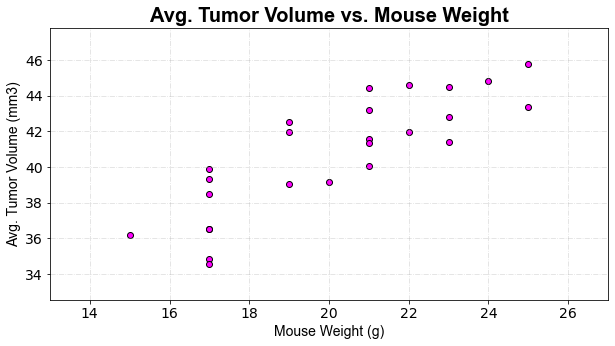

<Figure size 720x360 with 0 Axes>

In [80]:
plt.figure(figsize=(10,5))# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = capomulin.groupby("mouse_id")[["weight_g", "tumorVolume_mm3"]].mean()
weight_x = cap_avg["weight_g"]
vol_y = cap_avg["tumorVolume_mm3"]
plt.scatter(weight_x, vol_y, facecolor = 'magenta', edgecolor="black")

# Some plot design tweaks
plt.title("Avg. Tumor Volume vs. Mouse Weight",fontname='Arial',fontsize=20, fontweight="bold")
plt.xlabel("Mouse Weight (g)",fontsize = 14, fontname='Arial')
plt.ylabel("Avg. Tumor Volume (mm3)", fontsize = 14, fontname='Arial')
plt.xlim(min(weight_x) - 2, max(weight_x) + 2)
plt.ylim(min(vol_y) - 2, max(vol_y) + 2)
plt.grid(linestyle='-.', alpha = 0.4)
plt.show()
plt.figure(figsize=(10,5))



plt.show()

## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrs = capomulin.corr()
corrs


,age_months,weight_g,Timepoint,tumorVolume_mm3,metastatic_sites,last_timepoint
age_months,1.000000,-0.169172,-0.057964,-0.021604,0.006748,-0.247503
weight_g,-0.169172,1.000000,-0.035271,0.525700,-0.119149,-0.150607
Timepoint,-0.057964,-0.035271,1.000000,-0.584271,0.584006,0.234195
tumorVolume_mm3,-0.021604,0.525700,-0.584271,1.000000,-0.313092,-0.048181
metastatic_sites,0.006748,-0.119149,0.584006,-0.313092,1.000000,0.218792
last_timepoint,-0.247503,-0.150607,0.234195,-0.048181,0.218792,1.000000


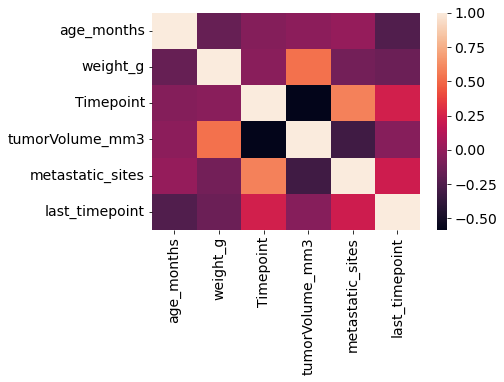

In [72]:
sns.heatmap(corrs)
plt.show()

In [73]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x, vol_y)

In [74]:
linregress(weight_x,vol_y)

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [75]:
preds = weight_x * slope + intercept

preds

mouse_id
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: weight_g, dtype: float64

C:\Users\brand\AppData\Local\Temp/ipykernel_19352/154876348.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(weight_x,regress_values,"r-", color = "orange")


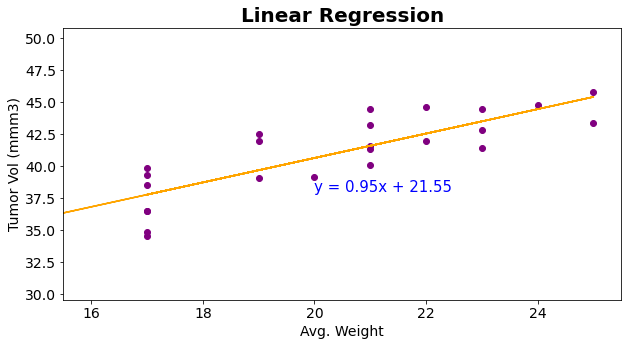

In [104]:
# Add the linear regression equation and line to plot
plt.figure(figsize=(10,5))
weight_x = cap_avg["weight_g"]
vol_y = cap_avg["tumorVolume_mm3"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_x,vol_y)
regress_values = weight_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_x,vol_y, facecolor = "purple")
plt.plot(weight_x,regress_values,"r-", color = "orange")
plt.annotate(line_eq,(20,38),fontsize=15,color="blue")
plt.title("Linear Regression", fontsize=20, fontweight='bold')
plt.xlabel('Avg. Weight', fontsize = 14)
plt.ylabel('Tumor Vol (mmm3)', fontsize=14)
plt.xlim(min(weight_x)+.5, max(weight_x)+.5)
plt.ylim(min(vol_y) - 5, max(vol_y) + 5)
plt.show()

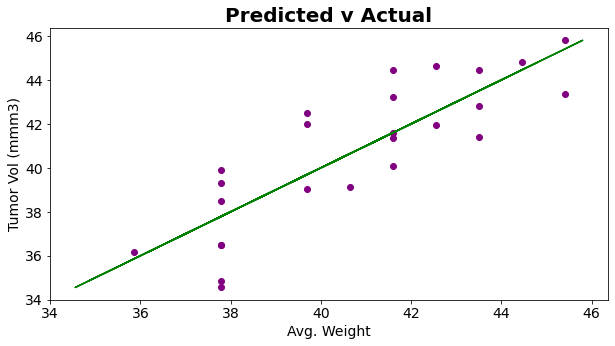

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(preds,vol_y, color = "purple")
plt.plot(vol_y,vol_y, color="green")
plt.title("Predicted v Actual", fontsize=20, fontweight="bold")
plt.xlabel('Avg. Weight', fontsize = 14)
plt.ylabel('Tumor Vol (mmm3)', fontsize=14)
plt.show()

In [107]:
X = cap_avg["weight_g"]
X = sm.add_constant(X) # adding a constant

y = cap_avg["tumorVolume_mm3"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        tumorVolume_mm3   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.32e-07
Time:                        23:44:53   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.0

C:\Users\brand\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
